# Pytorch-Tutorial

Author: Brandon Lin

Date: 2023.03.19

Written in Shanghai Jiao Tong University

## Verify Installation
- Torch version
- Cuda availability

In [25]:
import torch
from torch import nn
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
import torch.nn.functional as F
from torch import optim

import torchvision
from torchvision import utils
from torchvision import transforms

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

torch.__version__, torchvision.__version__ 

('1.12.1', '0.13.1')

In [12]:
torch.cuda.is_available(), torch.cuda.device_count(), torch.cuda.get_device_name(0)

(True, 2, 'GeForce GTX 1080 Ti')

## Loading and Processing Data 

### Download and Store
- Path to store data: `path2data = "./PATH"`, modify `PATH` on your own
- Loading data: `train_data = ..., val_data = ...`, download and store the data from sources
    - Usually, the format of `train_data` is like: `train_data[INDEX_OF_PICTURES] = [X_DATA, Y_DATA]`
    - Train_data, Validation_data and Test_data are separated.
    
- Then, seperate the data into `x_train = ..., y_train = ..., x_valid = ..., y_valid = ...`

In [13]:
### ---Example of MNIST--- ###
from torchvision import datasets

# path to store data and/or load from
path2data = "./data"

# loading training data
train_data = datasets.MNIST(path2data, train=True, download=True)

# extract data and targets
x_train, y_train = train_data.data, train_data.targets

# loading validation data
val_data = datasets.MNIST(path2data, train=False, download=True)

# extract data and targets
x_val, y_val = val_data.data, val_data.targets

for item in [x_train, y_train, x_val, y_val]:
    print(f"{item.shape}")

torch.Size([60000, 28, 28])
torch.Size([60000])
torch.Size([10000, 28, 28])
torch.Size([10000])


### Display

- We frequently use `matplotlib` to display the image.
- Requirements for input data: In pytorch, expect input data to be in the format $B \times C \times H \times W$, where:
    - $B$: Number of images in the batch
    - $C$: Number of color channels in each image (e.g., 3 for RGB images)
    - $H$: Height of each image
    - $W$: Width of each image

- If the shape don't match, you can use the `unsqueeze(PLACE_INDEX)` method, for example `unsqueeze(1)` is adding a dimension at $C$ place.

- Then, we use `utils.make_grid(x_train[NUM], nrow=NUM, padding=NUM)` (formally imported from `torchvision`) to transform into a Tensor containing grid of images. Fill in the first `NUM` with the number of pictures you want to display, and the second `NUM` the number of pictures in each row of the output.

- Finally we shall use a function to transform the tensor into numpy data, so `matplotlib` could display them. Notice that `plt.imshow` wants input size as $H\times W\times C$, so we need to transform it, more likely: 

```python
img = utils.make_grid(x_train[:24], nrow=8, padding=2)
npimg = img.numpy()
npimg_tr = np.transpose(npimg, (1, 2, 0)) # Turning BCHW -> HWC
plt.imshow(npimg_tr)
```

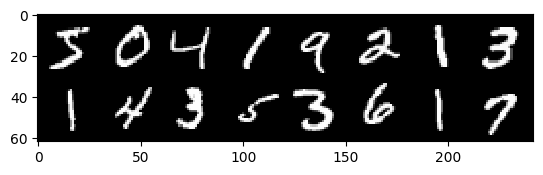

In [14]:
### ---Example of MNIST--- ###
from torchvision import utils

# First, add a dimension to tensor to become B*C*H*W
if len(x_train.shape)==3:
    x_train=x_train.unsqueeze(1)

if len(x_val.shape)==3:
    x_val = x_val.unsqueeze(1)

# make a grid of 16 images, 8 images per row
x_grid = utils.make_grid(x_train[:16], nrow=8, padding=2)

# helper function to display images
def show(img):
    # convert tensor to numpy array
    npimg = img.numpy()
    
    # Convert to H*W*C shape
    npimg_tr = np.transpose(npimg, (1,2,0))
    
    # display images
    plt.imshow(npimg_tr, interpolation='nearest')

# call helper function
show(x_grid)

### Process or Transformation
- Transformation data are recorded in a single variable, using `transformations.Compose`
- To trace a single picture's difference after certain transformation, notice that:
    - `transformation` accepts an image.
    - We usually end up with `ToTensor()` in order to deal with this picture. Therefore, after the transformation, the data is a `tensor`, therefore it is necessarily for us to `numpy` it, don't forget to `squeeze` it in the end.

In [15]:
from torchvision import transforms

# define transformations
data_transform = transforms.Compose([transforms.RandomHorizontalFlip(p=1),
                                    transforms.RandomVerticalFlip(p=1),
                                    transforms.ToTensor(),
                                    ])

Text(0.5, 1.0, 'transformed')

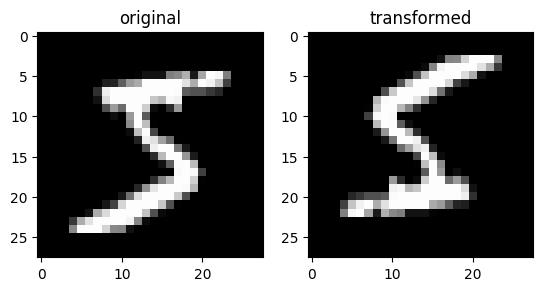

In [16]:
### ---Example for demonstrating the transformed effects--- ###
img = train_data[0][0]
img_trans = data_transform(img).numpy().squeeze() # Squeeze is necessarily

plt.subplot(1,2,1)
plt.imshow(img,cmap="gray")
plt.title("original")
plt.subplot(1,2,2)
plt.imshow(img_trans,cmap="gray");
plt.title("transformed")

## Dataset, Dataloader
- We use `TensorDataset` to combine both `x` and `y` (both tensors), or input and outputs.
- We use `Dataloader` to do iterations over `dataset`s we created.

In [17]:
### ---Example: Tensors -> TensorDataset--- ###
from torch.utils.data import TensorDataset

# wrap tensors into a dataset
train_ds = TensorDataset(x_train, y_train)
val_ds = TensorDataset(x_val, y_val)

for x, y in train_ds:
    print(x.shape,y.item()) # Display what is y
    break

torch.Size([1, 28, 28]) 5


In [18]:
### ---Example: Iteration over Dataset--- ###
from torch.utils.data import DataLoader

# create a data loader from dataset
train_dl = DataLoader(train_ds, batch_size=8)
val_dl = DataLoader(val_ds, batch_size=8)

# iterate over batches
for xb, yb in train_dl:
    ### Train them and add things below! ###
    pass

## Define models
- Ways to define models:
    - Using `nn.Sequential`
    - Using `nn.Module`

- You would probably perfer using GPU to run your models. Therefore we have: `device = torch.device("cuda:0"); model.to(device)`

- Sometimes, models are too big with many layers. `Torchsummary` is a fascinating module to give you a summary of the model. Remember to `!pip install torchsummary` if you don't have one, and `from torchsummary import summary` from the very begining.
    - Usage: `summary(MODEL, input_size=(SIZE))`

In [19]:
### ---Example: nn.Sequential--- ###
from torch import nn

# define a two-layer model
model = nn.Sequential(
                        nn.Linear(4, 5),
                        nn.ReLU(), # relu is not shown in the figure.
                        nn.Linear(5, 1),)
print(model)

Sequential(
  (0): Linear(in_features=4, out_features=5, bias=True)
  (1): ReLU()
  (2): Linear(in_features=5, out_features=1, bias=True)
)


In [20]:
### ---Example: nn.Module--- ###
import torch.nn.functional as F
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 8, 5, 1)
        self.conv2 = nn.Conv2d(8, 16, 5, 1)
        self.fc1 = nn.Linear(4*4*16, 100)
        self.fc2 = nn.Linear(100, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*16)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

model = Net()
device = torch.device("cuda:0")
model.to(device)

print(next(model.parameters()).device)
print(model)

cuda:0
Net(
  (conv1): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=10, bias=True)
)


In [21]:
### ---Example: Print a summary of the model--- ###
from torchsummary import summary

summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 24, 24]             208
            Conv2d-2             [-1, 16, 8, 8]           3,216
            Linear-3                  [-1, 100]          25,700
            Linear-4                   [-1, 10]           1,010
Total params: 30,134
Trainable params: 30,134
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.04
Params size (MB): 0.11
Estimated Total Size (MB): 0.16
----------------------------------------------------------------


## Loss function and Optimization
### Loss function
- Definition of the loss function: `loss_func = nn.NLLLoss(reduction="sum")`
- We calculate the loss as `loss = loss_func(output, real)`
- `metrics_batch(target, output)` calculates **the number of correct predictions in a batch** by comparing the predicted class (obtained using argmax) with the target class. It returns the number of correct predictions.
    - `output` is a prediction of the picture in each class. We need to find the highest possibility using `argmax(dim=1, keepdim=True)`.
    - Probably, you need to reshape the tensors, so `view_as` is used here.
    
- `loss_batch(def loss_batch(loss_func, xb, yb, yb_h, opt=None)` computes **the loss and performance metric** (e.g., number of correct predictions) for a given batch of data. 
    - `yb_h`: The model's output tensor (predictions)
    
- `loss_epoch` computes **the average loss and performance metric** over an entire epoch (one pass through the dataset)

### Optimization
- Optimization should be done right after the loss has been calculated. So I add this pasrt in the `loss_batch` function, so this will function for each batch:
    - Calculate the gradient
    - March! (This is upgrade the parameters)
    - Reset the gradient to 0, or else it will not behave as we expected for the next batch.
    
- Definition of the optimizer: `opt = optim.Adam(model.parameters(), lr=1e-4)`, note that `from torch import optim`
- Update model parameters: `opt.step()`
- Set gradients to zero: `opt.zero_grad()`

In [31]:
### ---Example: Loss functions, used in each batch and each epoch--- ###
def metrics_batch(target, output):
    # obtain output class
    pred = output.argmax(dim=1, keepdim=True)
    
    # compare output class with target class
    corrects = pred.eq(target.view_as(pred)).sum().item()
    return corrects

def loss_batch(loss_func, xb, yb, yb_h, opt=None):
    
    # obtain loss
    loss = loss_func(yb_h, yb)
    
    # obtain performance metric
    metric_b = metrics_batch(yb, yb_h)
    
    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()

    return loss.item(), metric_b


def loss_epoch(model,loss_func,dataset_dl, opt=None):
    loss = 0.0
    metric = 0.0
    len_data = len(dataset_dl.dataset)
    for xb, yb in dataset_dl:
        xb = xb.type(torch.float).to(device)
        yb = yb.to(device)
        
        # obtain model output
        yb_h = model(xb)

        loss_b, metric_b = loss_batch(loss_func, xb, yb,yb_h, opt)
        loss += loss_b
        if metric_b is not None:
            metric += metric_b
            
    loss /= len_data
    metric /= len_data
    return loss, metric

## Train
- For each training process, we need to divide the training into several epochs, with each epoch doing same things, mainly:
    - Train the model (using `model.train()`)
    - Calculate the loss (introduced above)
    - Optimizing during the process (introduced above)
    - The model steps into evaluation mode, that is a hint for the model to stop updating its parameters, and being applied to test datas.
    - Output the result.

- The function goes like the example below.

In [34]:
### ---Example: Training---- ###
def train_val(epochs, model, loss_func, opt, train_dl, val_dl):
    for epoch in range(epochs):
        model.train()
        train_loss, train_metric = loss_epoch(model,loss_func,train_dl, opt)
                    
        model.eval()
        with torch.no_grad():
            val_loss, val_metric = loss_epoch(model,loss_func,val_dl)
        
        accuracy = 100 * val_metric

        print("epoch: %d, train loss: %.6f, val loss: %.6f, accuracy: %.2f" %(epoch, train_loss,val_loss, accuracy))

In [32]:
num_epochs=5
loss_func = nn.NLLLoss(reduction="sum")
opt = optim.Adam(model.parameters(), lr=1e-4)

train_val(num_epochs, model, loss_func, opt, train_dl, val_dl)

epoch: 0, train loss: 0.020758, val loss: 0.061965, accuracy: 98.34
epoch: 1, train loss: 0.015394, val loss: 0.053161, accuracy: 98.68
epoch: 2, train loss: 0.012872, val loss: 0.060444, accuracy: 98.47
epoch: 3, train loss: 0.011336, val loss: 0.058657, accuracy: 98.61
epoch: 4, train loss: 0.009400, val loss: 0.054817, accuracy: 98.69


## Verification

torch.Size([1, 28, 28])
4 4


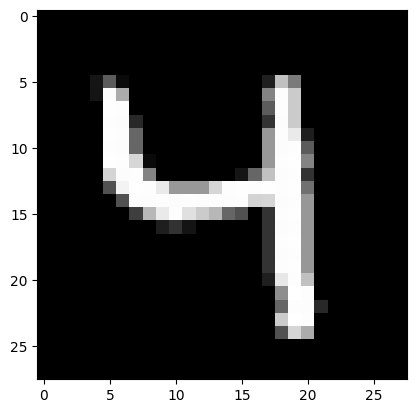

In [47]:
# x is a data point with C*H*W shape
n = 901
x = x_val[n]
y = y_val[n]
print(x.shape)
plt.imshow(x.numpy()[0],cmap="gray")

# we use unsqueeze to expand dimensions to 1*C*H*W
x= x.unsqueeze(0)

# convert to torch.float32
x=x.type(torch.float)

# move to cuda device
x=x.to(device)

# get model output
output = model(x)

# get predicted class
pred = output.argmax(dim=1, keepdim=True)
print (pred.item(),y.item())